In [68]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [69]:
imgOriginal = Image.open(r"MichaelScottmd.jpg").convert("L")

In [86]:
def hamming_encode(bits):
    p1 = (bits[0] + bits[1] + bits[3])%2
    p2 = (bits[0] + bits[2] + bits[3])%2
    p3 = (bits[1] + bits[2] + bits[3])%2
    return np.array([bits[0], bits[1], bits[2], bits[3], p1, p2, p3])

def hamming_decode(hamming_code):
    m = hamming_code[0:4]
    s = (hamming_code @ np.array([[0,0,1],[0,1,0],[0,1,1],[1,0,0],[1,0,1],[1,1,0],[1,1,1]]))%2
    pos = np.array([4,2,1]) @ s
    if (pos > 0) and (pos < 5):
        m[pos-1] = (m[pos-1] + 1)%2
    return np.array(m)

In [71]:
def simularRuido(imagem, itsdRuido):
    imagem = np.array(imagem)

    aux = np.where(imagem == 0, -1, 1).astype(float)
    ruido = np.random.normal(0, itsdRuido, imagem.shape)
    aux += ruido
    aux = np.where(aux < 0, 0, 1)

    return aux

In [72]:
def simulate(image, itensidade_do_ruido = 1, hamming=False, tamanho_da_imagem=(256,256)):
    image = np.array(imgOriginal)

    image = np.resize(image, tamanho_da_imagem)

    bits = np.unpackbits(image)

    if hamming:
        bits = np.array([hamming_encode(bits[i:i+4]) for i in range(0, len(bits), 4)])
    else:
        bits = np.array([bits[i:i+4] for i in range(0, len(bits), 4)])

    bits = simularRuido(bits, itensidade_do_ruido)

    if hamming:
        decoded_bits = np.array([hamming_decode(bits[i]) for i in range(len(bits))])
    else:
        decoded_bits = np.array([bits[i] for i in range(len(bits))])

    decoded_image = np.packbits(decoded_bits)
    decoded_image = np.resize(decoded_image, tamanho_da_imagem)


    imgNova = Image.new('L', (image.shape[0]*2, image.shape[1]))
    imgNova.paste(imgOriginal, (0, 0))

    imgNova.paste(Image.fromarray(decoded_image), (image.shape[0], 0))

    return decoded_bits.flatten(), imgNova

In [73]:
def calculoErro(bin_img, bin_img_2):
    return np.sum(bin_img != bin_img_2)

def get_erros(imagem, hamming=False, tamanho_da_imagem=(256,256)):
    img_arr = np.array(imagem)
    x, y = [], []
    total_dig = img_arr.shape[0]*img_arr.shape[1]*8
    for i in np.arange(0, 10, 0.1):
        x.append(i)

        y.append(calculoErro(np.unpackbits(img_arr), simulate(imagem, i, hamming, tamanho_da_imagem)[0])/total_dig)
    return x, y

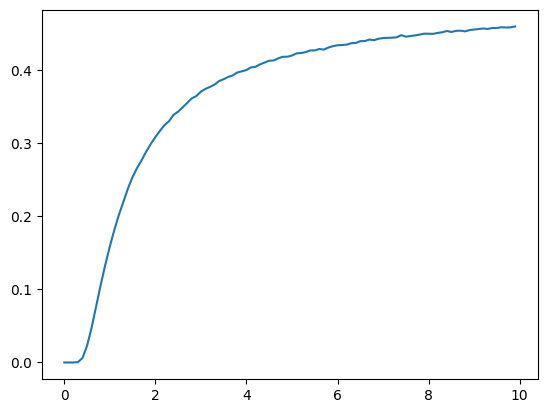

In [85]:
x, y = get_erros(imgOriginal, False)
plt.plot(x, y)

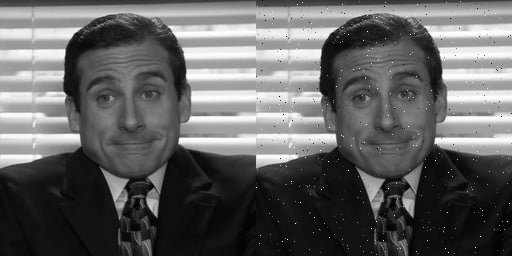

In [84]:
_, img = simulate(imgOriginal, 0.5, True)
display(img)

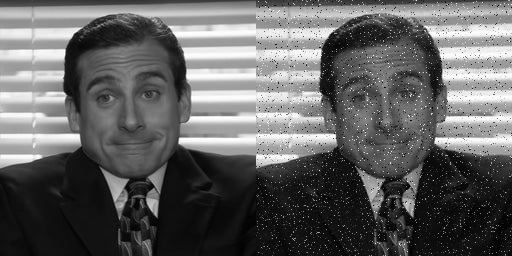

In [83]:
_, img = simulate(imgOriginal, 0.5, False)
display(img)

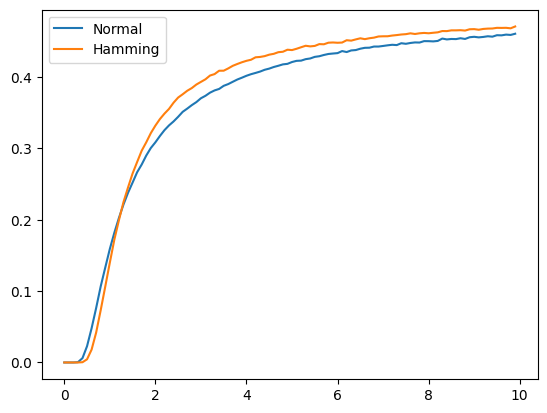

In [77]:
x, y = get_erros(imgOriginal, False)
plt.plot(x, y)
x, y = get_erros(imgOriginal, True)
plt.plot(x, y)
plt.legend(['Normal', 'Hamming'])